### Laboratorio 5

grupo:
- Gabriela Contreras: 20213
- Paola de León: 20361
- Diego Córdova: 20212

In [89]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np

In [90]:
import gymnasium as gym

env = gym.make("CliffWalking-v0")

# Parametros
alpha = 0.1
gamma = 0.99
epsilon = 0.1
episodes = 500

max_steps_per_episode = 100

n_actions = env.action_space.n
n_states = env.observation_space.n

# Función epsilon-greedy
def epsilon_greedy_policy(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(n_actions)
    else:
        return np.argmax(Q[state])

Q = np.zeros((n_states, n_actions))

### Implementacion de SARSA

In [91]:
# Algoritmo SARSA
# Code based on: https://www.geeksforgeeks.org/sarsa-reinforcement-learning/
 
#Function to learn the Q-value
def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    return Q[state, action] + alpha * (reward + gamma * Q[state2, action2] - predict)

def sars_step(env, state, action):
    next_state, reward, done, _, _ = env.step(action)
    if done: return state, action, reward, done

    next_action = epsilon_greedy_policy(next_state, Q, epsilon)

    Q[state, action] = update(state, next_state, reward, action, next_action)

    return next_state, next_action, reward, done


### Implementacion de Q-Learning

### Ejecucion de Algoritmos

In [92]:
# Trinning Loop
def trainnin_loop(alg, episodes=10, max_steps_per_episode=10):
    rewards_per_episode = []

    for episode in range(episodes):
        total_reward = 0
        state, _ = env.reset()
        action = epsilon_greedy_policy(state, Q, epsilon)

        for step in range(max_steps_per_episode):
            
            new_state, new_action, reward, done = alg(env, state, action)
            
            total_reward += reward
            state, action = new_state, new_action

            if done:
                break

        rewards_per_episode.append(total_reward)

    return rewards_per_episode


### Graficos

In [93]:
def plot_rewards(rewards_per_episode):
    plt.plot(rewards_per_episode)
    plt.xlabel('Episodios')
    plt.ylabel('Recompensa total')
    plt.title('Recompensa total por episodio en SARSA')
    plt.show()

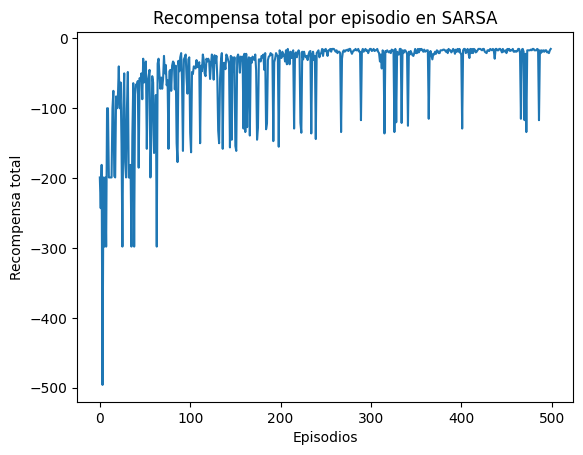

In [94]:
history = trainnin_loop(sars_step, 500, 100)
plt.plot(history)
plt.xlabel('Episodios')
plt.ylabel('Recompensa total')
plt.title('Recompensa total por episodio en SARSA')
plt.show()

### Resultados